In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from scipy.optimize import curve_fit
import math
import warnings
import sys
import os
import os.path
dir = os.getcwd()

In [11]:
N = 1000
d = 3
aA = 3.00
aG = 1.00
w0 = 1.00
eta = 2
a = [-0.1, -0.5, -0.1, -0.5, -0.1, -0.5, -0.1, -0.5, -0.1, -0.5, -0.1, -0.5]
a_interaction = [0.5, 0.5, 1, 1, 1.5, 1.5, 2, 2, 3, 3, 4, 4]

plt.style.use('dark_background')
cores = ['red', 'blue', 'yellow', 'green', 'violet', 'white']

bins = 100

In [12]:
def make_histogram(N, d, aA, aG, w0, eta, a, a_interaction, bins):

    # Folder Path
    path1 = r"C:\Users\caiqu\OneDrive\Área de Trabalho\Dados"
    path2 = '\\N_%d_d_%d_aA_%.2f_aG_%.2f_w0_%.2f_eta_%.2f_a_%.6f_a_interaction_%.3f' %(N, d, aA, aG, w0, eta, a, a_interaction)
    path = path1 + path2
    energy_list = np.array([])
    print(path)
    # Change the directory
    os.chdir(path)
    # iterate through all file
    for file in os.listdir():
        # Check whether file is in text format or not
        if file.endswith(".txt"):
            file_path = f"{path}\{file}"
            #print(file_path)
            # call read text file function
            tabela = np.loadtxt(file_path)
            energy_list = np.append(tabela[:,0], energy_list)

    energy_list = np.array( [ num for num in energy_list if num >= 0 ] )
    start, finish=min(energy_list), max(energy_list)

    bins_list=list(np.logspace(np.log10(start), np.log10(finish), num=bins))
    hist, edges=np.histogram(energy_list, bins=bins_list, density=True)

    p_e= hist/np.sum(hist)
    bins_midlist=edges[:-1]
    
    path3 = '\\Dados_processados'
    new_path = path +path3
    file = 'N_%d_d_%d_aA_%.2f_aG_%.2f_w0_%.2f_eta_%.2f_a_%.3f_a_interaction_%.3f_histogram_bins_%d.txt' %(N, d, aA, aG, w0, eta, a, a_interaction, bins)
    name = os.path.join(new_path, file)
    if not os.path.exists(new_path):
        os.mkdir(new_path)
    os.chdir(new_path)
    f = open(name, "w")
    for i in range (bins-1):
        f.write(str(bins_midlist[i]) + '\t' + str(p_e[i]) + '\n')
    f.close()
    return 'DONE'




In [13]:
for i in range (len(a)):
    make_histogram(N, d, aA, aG, w0, eta, a[i], a_interaction[i], bins)

C:\Users\caiqu\OneDrive\Área de Trabalho\Dados\N_1000_d_3_aA_3.00_aG_1.00_w0_1.00_eta_2.00_a_-0.100000_a_interaction_0.500
C:\Users\caiqu\OneDrive\Área de Trabalho\Dados\N_1000_d_3_aA_3.00_aG_1.00_w0_1.00_eta_2.00_a_-0.500000_a_interaction_0.500
C:\Users\caiqu\OneDrive\Área de Trabalho\Dados\N_1000_d_3_aA_3.00_aG_1.00_w0_1.00_eta_2.00_a_-0.100000_a_interaction_1.000
C:\Users\caiqu\OneDrive\Área de Trabalho\Dados\N_1000_d_3_aA_3.00_aG_1.00_w0_1.00_eta_2.00_a_-0.500000_a_interaction_1.000
C:\Users\caiqu\OneDrive\Área de Trabalho\Dados\N_1000_d_3_aA_3.00_aG_1.00_w0_1.00_eta_2.00_a_-0.100000_a_interaction_1.500
C:\Users\caiqu\OneDrive\Área de Trabalho\Dados\N_1000_d_3_aA_3.00_aG_1.00_w0_1.00_eta_2.00_a_-0.500000_a_interaction_1.500
C:\Users\caiqu\OneDrive\Área de Trabalho\Dados\N_1000_d_3_aA_3.00_aG_1.00_w0_1.00_eta_2.00_a_-0.100000_a_interaction_2.000
C:\Users\caiqu\OneDrive\Área de Trabalho\Dados\N_1000_d_3_aA_3.00_aG_1.00_w0_1.00_eta_2.00_a_-0.500000_a_interaction_2.000
C:\Users\caiqu\O

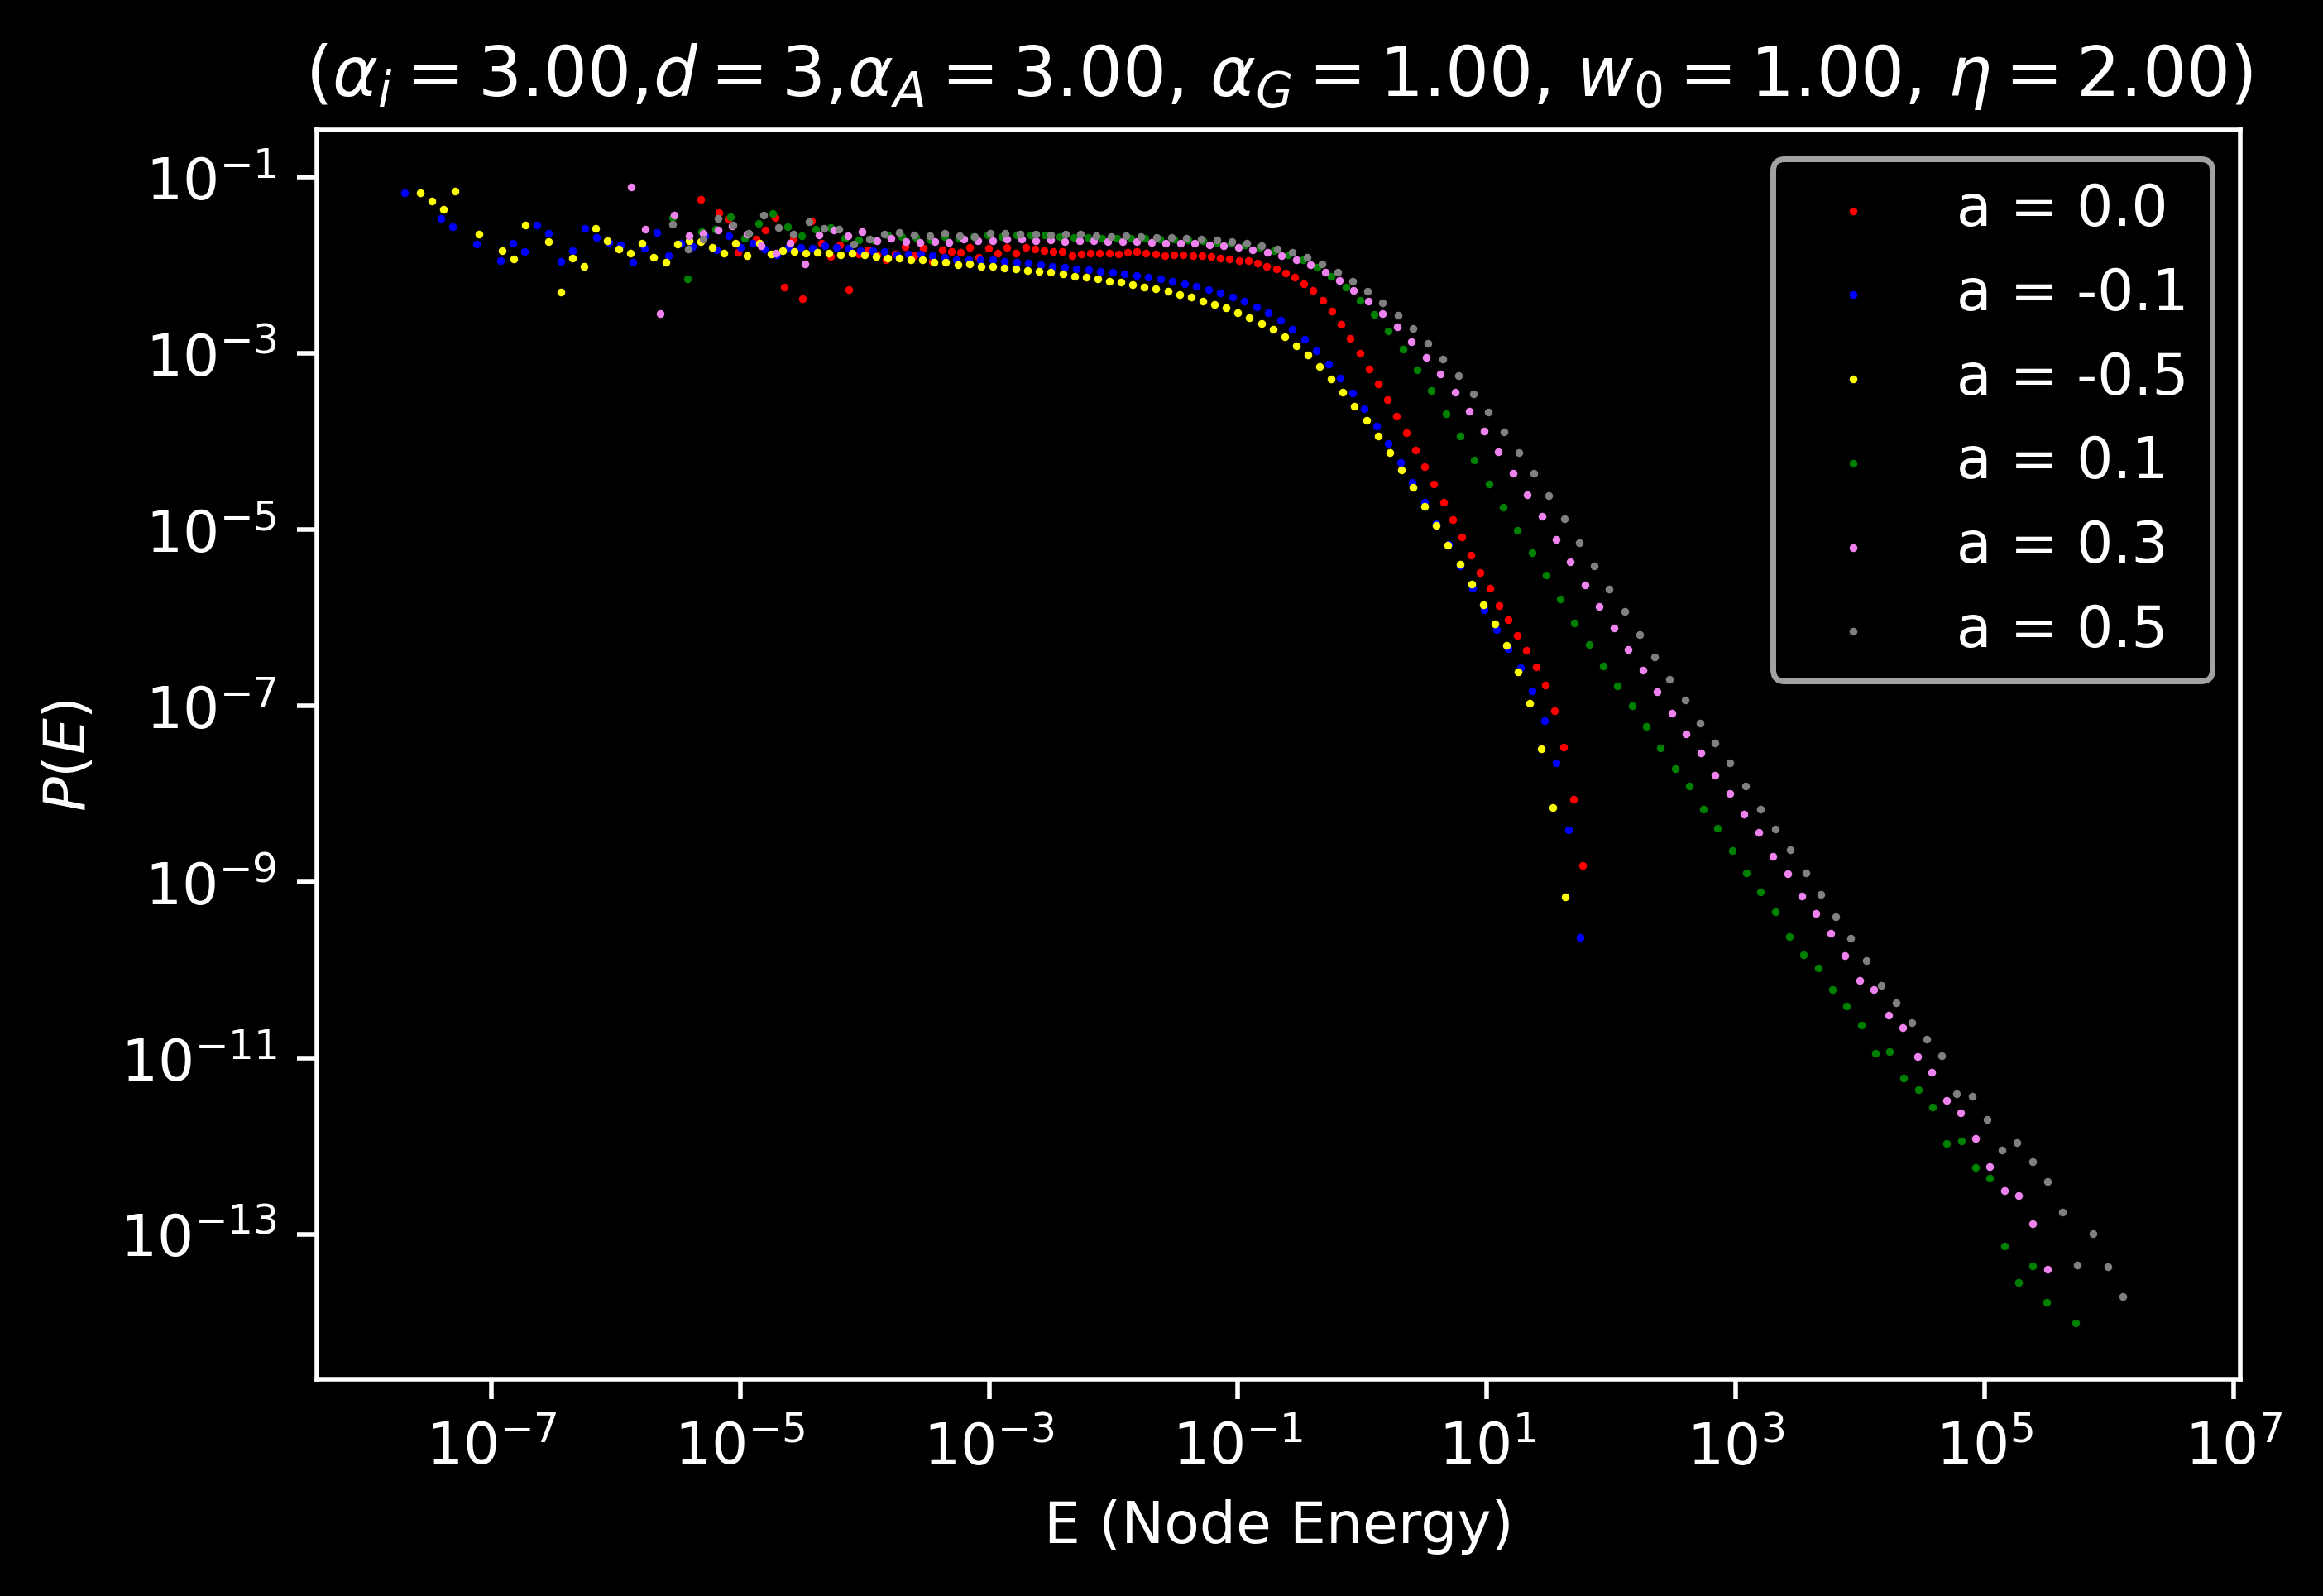

In [52]:
def analyse(N, d, aA, aG, w0, eta, a, a_interaction, bins):
    

    for i in range (len(a)): 
        path1 = r"C:\Users\caiqu\OneDrive\Área de Trabalho\Dados"
        path2 = '\\N_%d_d_%d_aA_%.2f_aG_%.2f_w0_%.2f_eta_%.2f_a_%.6f_a_interaction_%.3f' %(N, d, aA, aG, w0, eta, a[i], a_interaction)
        path3 = '\\Dados_processados'
        path = path1 + path2+ path3

        
        # Change the directory
        os.chdir(path)

        file = 'N_%d_d_%d_aA_%.2f_aG_%.2f_w0_%.2f_eta_%.2f_a_%.3f_a_interaction_%.3f_histogram_bins_%d.txt' %(N, d, aA, aG, w0, eta, a[i], a_interaction, bins)
        tabela = np.loadtxt(file)
        bins_midlist = tabela[:, 0]
        p_e = tabela[:, 1]

        plt.scatter(bins_midlist, p_e, s= 3,  linewidths = 0.5, c = cores[i],  marker='.', label = r'a = %.1f' %(a[i]))
    plt.rcParams["figure.dpi"] = 500
    plt.xscale('log')
    plt.yscale('log')
    #plt.xlimit()
    plt.xlabel(r'E (Node Energy)')
    plt.ylabel(r'$ P(E)$')
    plt.title(r'($ \alpha_{i} =  %.2f $,$ d= %d$,$ \alpha_{A} =  %.2f$, $\alpha_{G} =%.2f$, $w_{0} = %.2f$, $\eta =  %.2f$)' %(a_interaction, d, aA, aG, w0, eta))
    #plt.text(1E-5,1E-23,'Energia de cada nó \n (com correção) \n' + r'$E_{i} = \epsilon_{i} + \frac{a}{M}\Sigma_{j \neq i} \frac{\epsilon_{i}\epsilon_{j}}{d_{ij}^{\alpha_{i}}} $'+ '\n'+ r'$\epsilon_{i}$: energia individual do nó i' + '\n' + r'$M = \Sigma_{j \neq i} d_{ij}^{-\alpha_{i}}$', fontsize=11)

    plt.legend()
    #os.chdir(path1)
    #plt.savefig('d_%d_aA_%.2f_aG_%.2f_w0_%.2f_eta_%.2f.jpg' %(d[0], aA[0], aG[0], w0[0], eta[0]), dpi = 500)
    plt.show()

N = 1000
d = 3
aA = 3.00
aG = 1.00
w0 = 1.00
eta = 2
a = [0.0, -0.1, -0.5, 0.1, 0.3, 0.5]
a_interaction = 3

plt.style.use('dark_background')
cores = ['red', 'blue', 'yellow', 'green', 'violet', 'grey', 'magenta', 'white']

bins = 100
    
analyse(N, d, aA, aG, w0, eta, a, a_interaction, bins)
    

In [39]:
def make_histogram_ratio(N, d, aA, aG, w0, eta, a, a_interaction, bins):
    bins_midlist = [[]]*len(a)
    p_e = [[]]*len(a)
    for i in range (len(a)):
        path1 = r"C:\Users\caiqu\OneDrive\Área de Trabalho\Dados"
        path2 = '\\N_%d_d_%d_aA_%.2f_aG_%.2f_w0_%.2f_eta_%.2f_a_%.6f_a_interaction_%.3f' %(N, d, aA, aG, w0, eta, a[i], a_interaction)
        path3 = '\\Dados_processados'
        path = path1 + path2+ path3

        
        # Change the directory
        os.chdir(path)

        file = 'N_%d_d_%d_aA_%.2f_aG_%.2f_w0_%.2f_eta_%.2f_a_%.3f_a_interaction_%.3f_histogram_bins_%d.txt' %(N, d, aA, aG, w0, eta, a[i], a_interaction, bins)
        tabela = np.loadtxt(file)
        bins_midlist[i] = tabela[:, 0]
        p_e[i] = tabela[:, 1]

    #bins_midlist_np = np.array(bins_midlist)
    #p_e_np = np.array(p_e)
    min_list = np.zeros(len(a))
    max_list = np.zeros(len(a))
    
    for i in range(len(a)):
        min_list[i] = np.min(bins_midlist[i])
        max_list[i] = np.max(bins_midlist[i])

    min_bin = np.max(min_list)
    max_bin = np.min(max_list)

    p_e[0] = p_e[0][(len(bins_midlist[0]) - len([x for x in bins_midlist[0] if x > min_bin])):]
    bins_midlist[0] = [x for x in bins_midlist[0] if x > min_bin]
    #bins_midlist[0] = bins_midlist[0][1:]
    p_e[0] = p_e[0][:len([x for x in bins_midlist[0] if x < max_bin]) - (len(bins_midlist[0]))]
    bins_midlist[0] = [x for x in bins_midlist[0] if x < max_bin]
    #bins_midlist[0] = bins_midlist[0][:-1]

    ratio = np.zeros((len(a)-1, len(bins_midlist[0])))
    for i in range (len(a)-1):
        for j in range (len(bins_midlist[0])):
            x = bins_midlist[0][j]
            x1 = np.max([a for a in bins_midlist[i+1] if a < x ])
            x2 = np.min([a for a in bins_midlist[i+1] if a > x ])
            y1 = p_e[i+1][len(bins_midlist[i+1]) - len([a for a in bins_midlist[i+1] if a >= x])]
            y2 = p_e[i+1][len([a for a in bins_midlist[i+1] if a <= x]) - len(bins_midlist[i+1])]

            p_interpol = y1*(x - x2)/(x1 - x2) + y2*(x - x1)/(x2 - x1)
            ratio[i][j] = p_interpol/p_e[0][j]

            path1 = r"C:\Users\caiqu\OneDrive\Área de Trabalho\Dados\Ratios"
            path3 = '\\N_%d_d_%d_aA_%.2f_aG_%.2f_w0_%.2f_eta_%.2f_a_interaction_%.3f_histogram_bins_%d' %(N, d, aA, aG, w0, eta, a_interaction, bins)
            new_path = path1 +path3
            file = 'ratio_N_%d_d_%d_aA_%.2f_aG_%.2f_w0_%.2f_eta_%.2f_a_%.3f_a_interaction_%.3f_histogram_bins_%d.txt' %(N, d, aA, aG, w0, eta, a[i+1], a_interaction, bins)
            name = os.path.join(new_path, file)
            if not os.path.exists(new_path):
                os.mkdir(new_path)
            os.chdir(new_path)
            f = open(name, "w")
            for k in range (len(bins_midlist[0])-1):
                f.write(str(bins_midlist[0][k]) + '\t' + str(ratio[i][k]) + '\n')
            f.close()
    
        
N = 1000
d = 3
aA = 3.00
aG = 1.00
w0 = 1.00
eta = 2
a = [0.0,-0.5, -0.1, 0.1, 0.3, 0.5]
a_interaction = 1.5

plt.style.use('dark_background')
cores = ['red', 'blue', 'yellow', 'green', 'violet', 'white']

make_histogram_ratio(N, d, aA, aG, w0, eta, a, a_interaction, bins)
    

C:\Users\caiqu\AppData\Local\Temp\ipykernel_5112\2898613646.py:48: RuntimeWarning: divide by zero encountered in double_scalars
  ratio[i][j] = p_interpol/p_e[0][j]


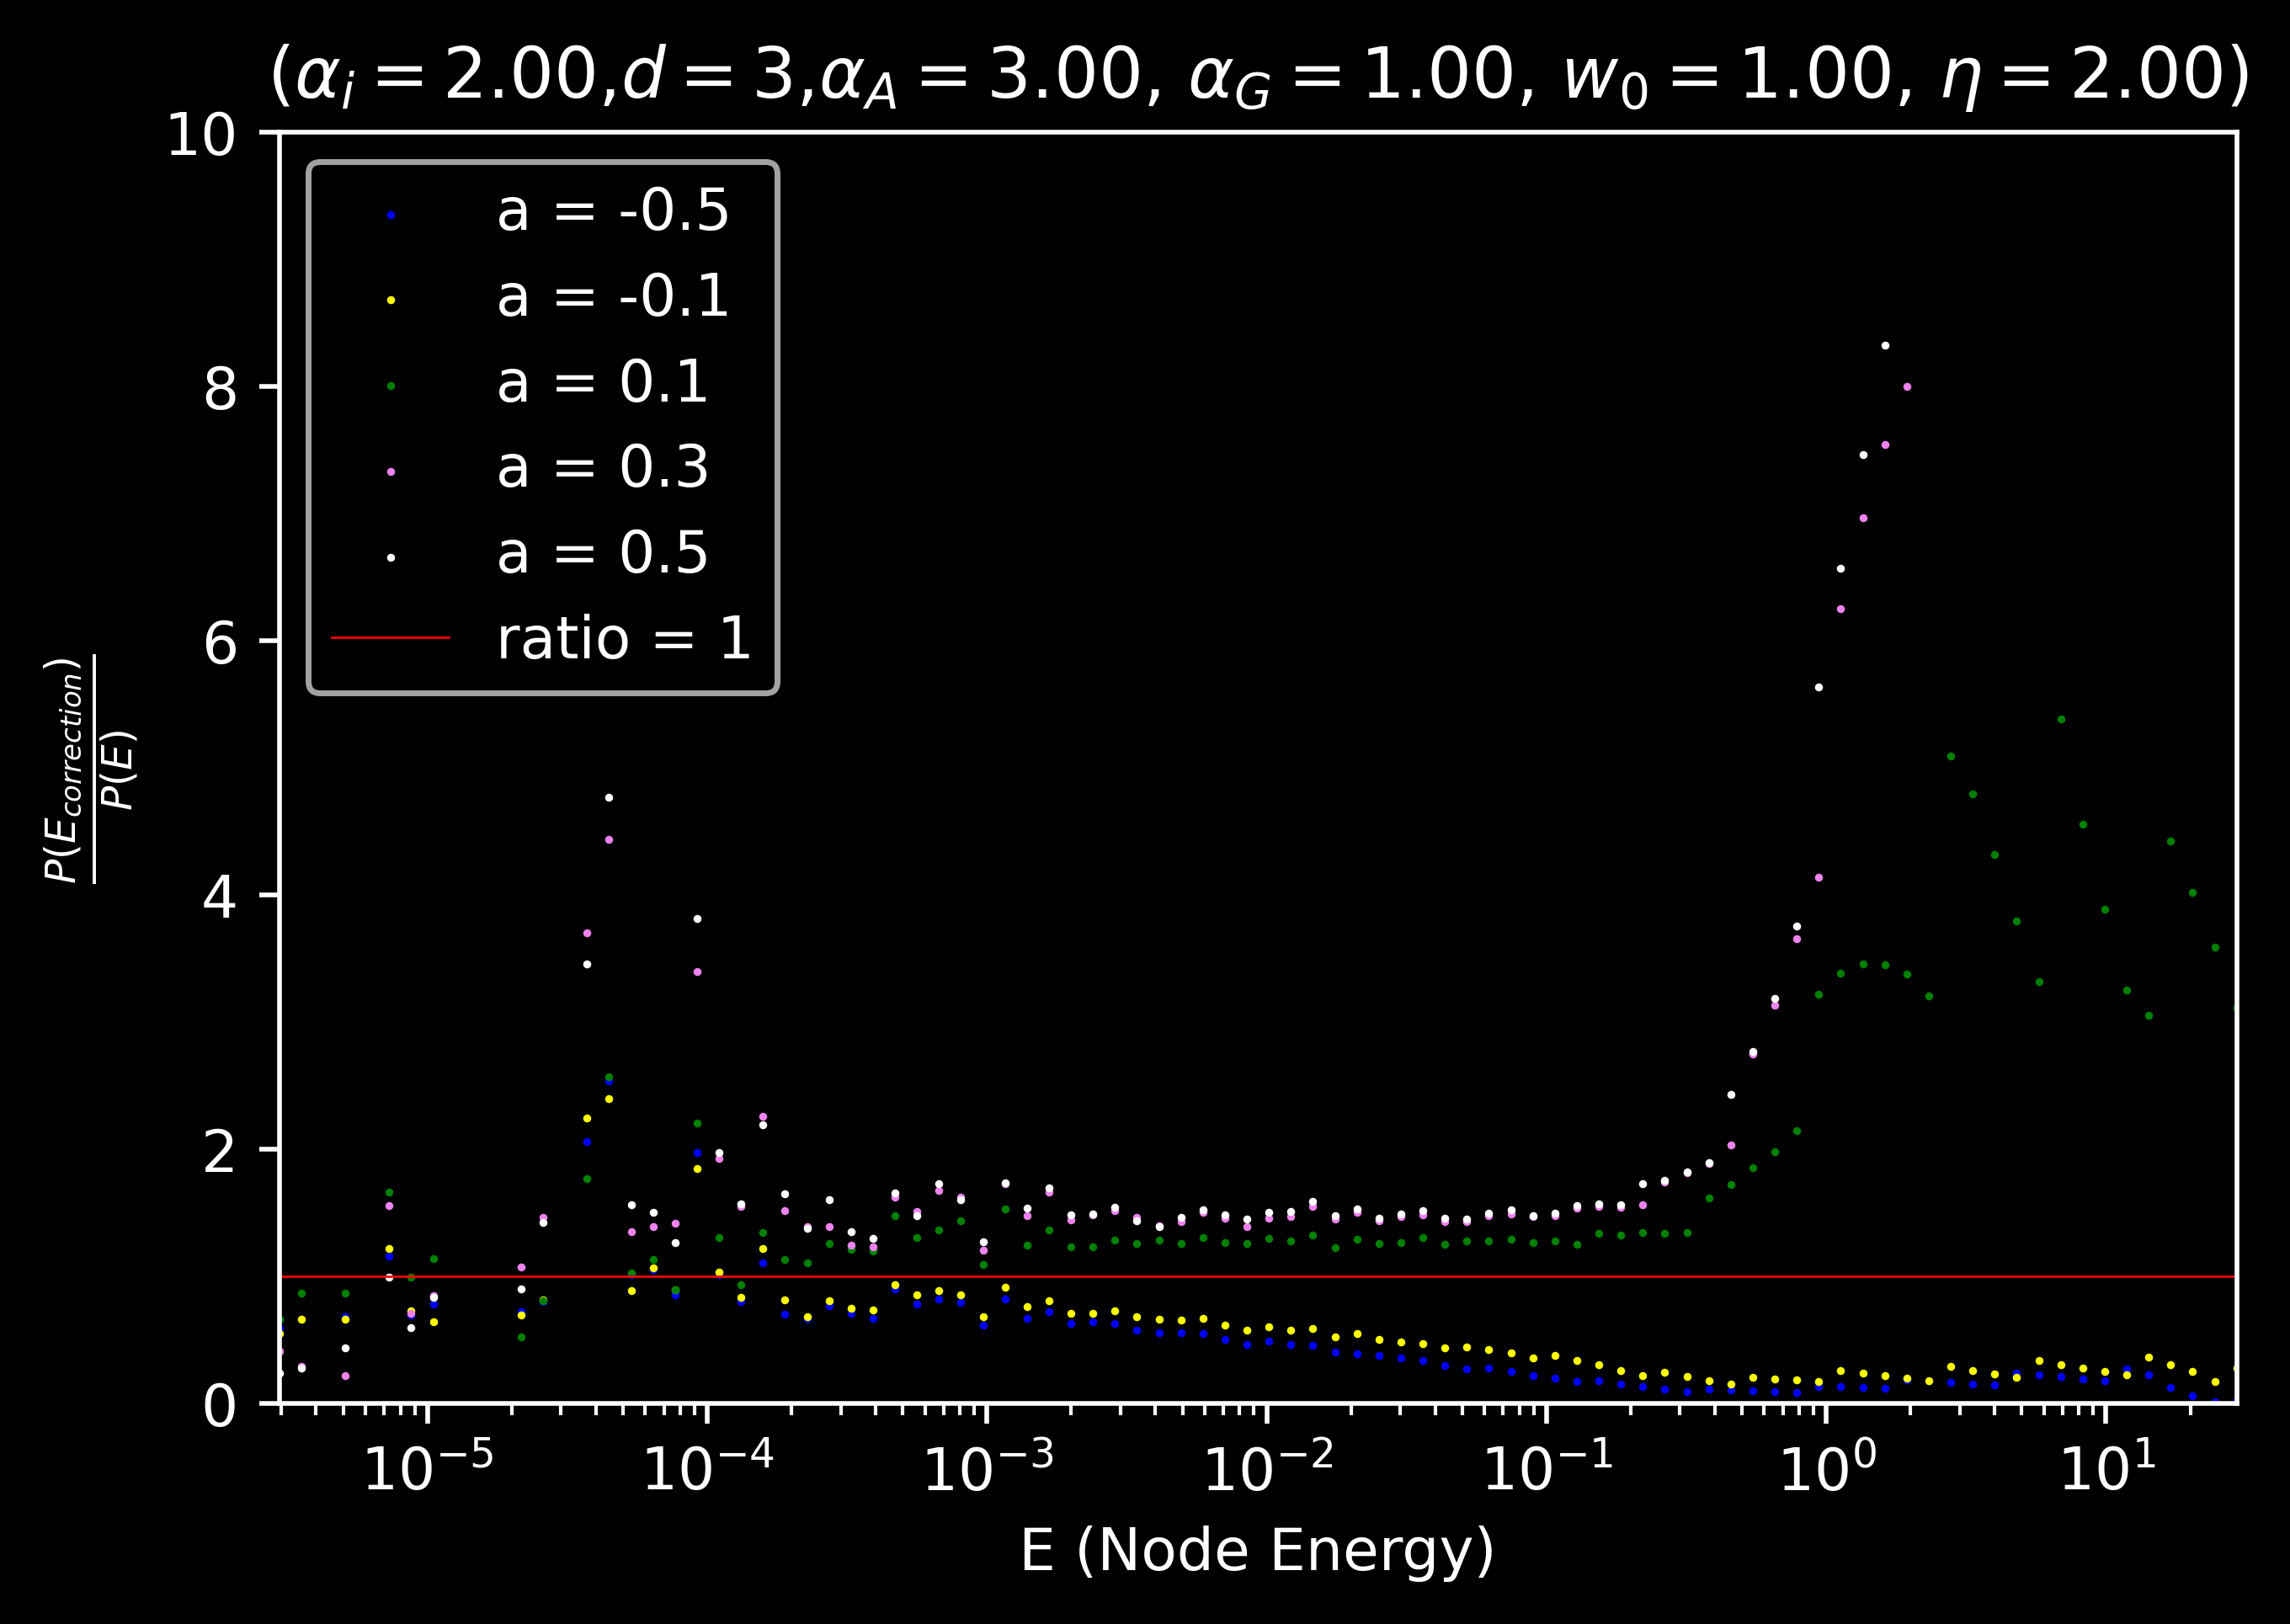

In [46]:
def analyse_ratio(N, d, aA, aG, w0, eta, a, a_interaction, bins):
    path1 = r"C:\Users\caiqu\OneDrive\Área de Trabalho\Dados\Ratios"
    path3 = '\\N_%d_d_%d_aA_%.2f_aG_%.2f_w0_%.2f_eta_%.2f_a_interaction_%.3f_histogram_bins_%d' %(N, d, aA, aG, w0, eta, a_interaction, bins)
    new_path = path1 +path3
    os.chdir(new_path)
    for i in range (len(a)-1):
        file = 'ratio_N_%d_d_%d_aA_%.2f_aG_%.2f_w0_%.2f_eta_%.2f_a_%.3f_a_interaction_%.3f_histogram_bins_%d.txt' %(N, d, aA, aG, w0, eta, a[i+1], a_interaction, bins)
        tabela = np.loadtxt(file)
        bins_midlist = tabela[:, 0]
        ratio = tabela[:, 1]
        plt.scatter(bins_midlist, ratio, s= 3,  linewidths = 0.5, c = cores[i+1],  marker='.', label = r'a = %.1f' %(a[i+1]))
    ones = np.ones(len(bins_midlist))
    plt.plot(bins_midlist, ones, c = 'red', linewidth = 0.4, label = 'ratio = 1')
    plt.rcParams["figure.dpi"] = 500
    plt.xscale('log')   
    plt.xlim(np.min(bins_midlist), np.max(bins_midlist))
    plt.xlabel(r'E (Node Energy)')
    plt.ylim(0,10)
    plt.ylabel(r'$ \frac{P(E_{correction})}{P(E)}$')
    plt.title(r'($ \alpha_{i} =  %.2f $,$ d= %d$,$ \alpha_{A} =  %.2f$, $\alpha_{G} =%.2f$, $w_{0} = %.2f$, $\eta =  %.2f$)' %(a_interaction, d, aA, aG, w0, eta))
    #plt.text(1E-5,1E-23,'Energia de cada nó \n (com correção) \n' + r'$E_{i} = \epsilon_{i} + \frac{a}{M}\Sigma_{j \neq i} \frac{\epsilon_{i}\epsilon_{j}}{d_{ij}^{\alpha_{i}}} $'+ '\n'+ r'$\epsilon_{i}$: energia individual do nó i' + '\n' + r'$M = \Sigma_{j \neq i} d_{ij}^{-\alpha_{i}}$', fontsize=11)

    plt.legend()
    #os.chdir(path1)
    #plt.savefig('d_%d_aA_%.2f_aG_%.2f_w0_%.2f_eta_%.2f.jpg' %(d[0], aA[0], aG[0], w0[0], eta[0]), dpi = 500)
    plt.show()
    
        
N = 1000
d = 3
aA = 3.00
aG = 1.00
w0 = 1.00
eta = 2
a = [0.0,-0.5, -0.1, 0.1, 0.3, 0.5]
a_interaction = 2
analyse_ratio(N, d, aA, aG, w0, eta, a, a_interaction, bins)

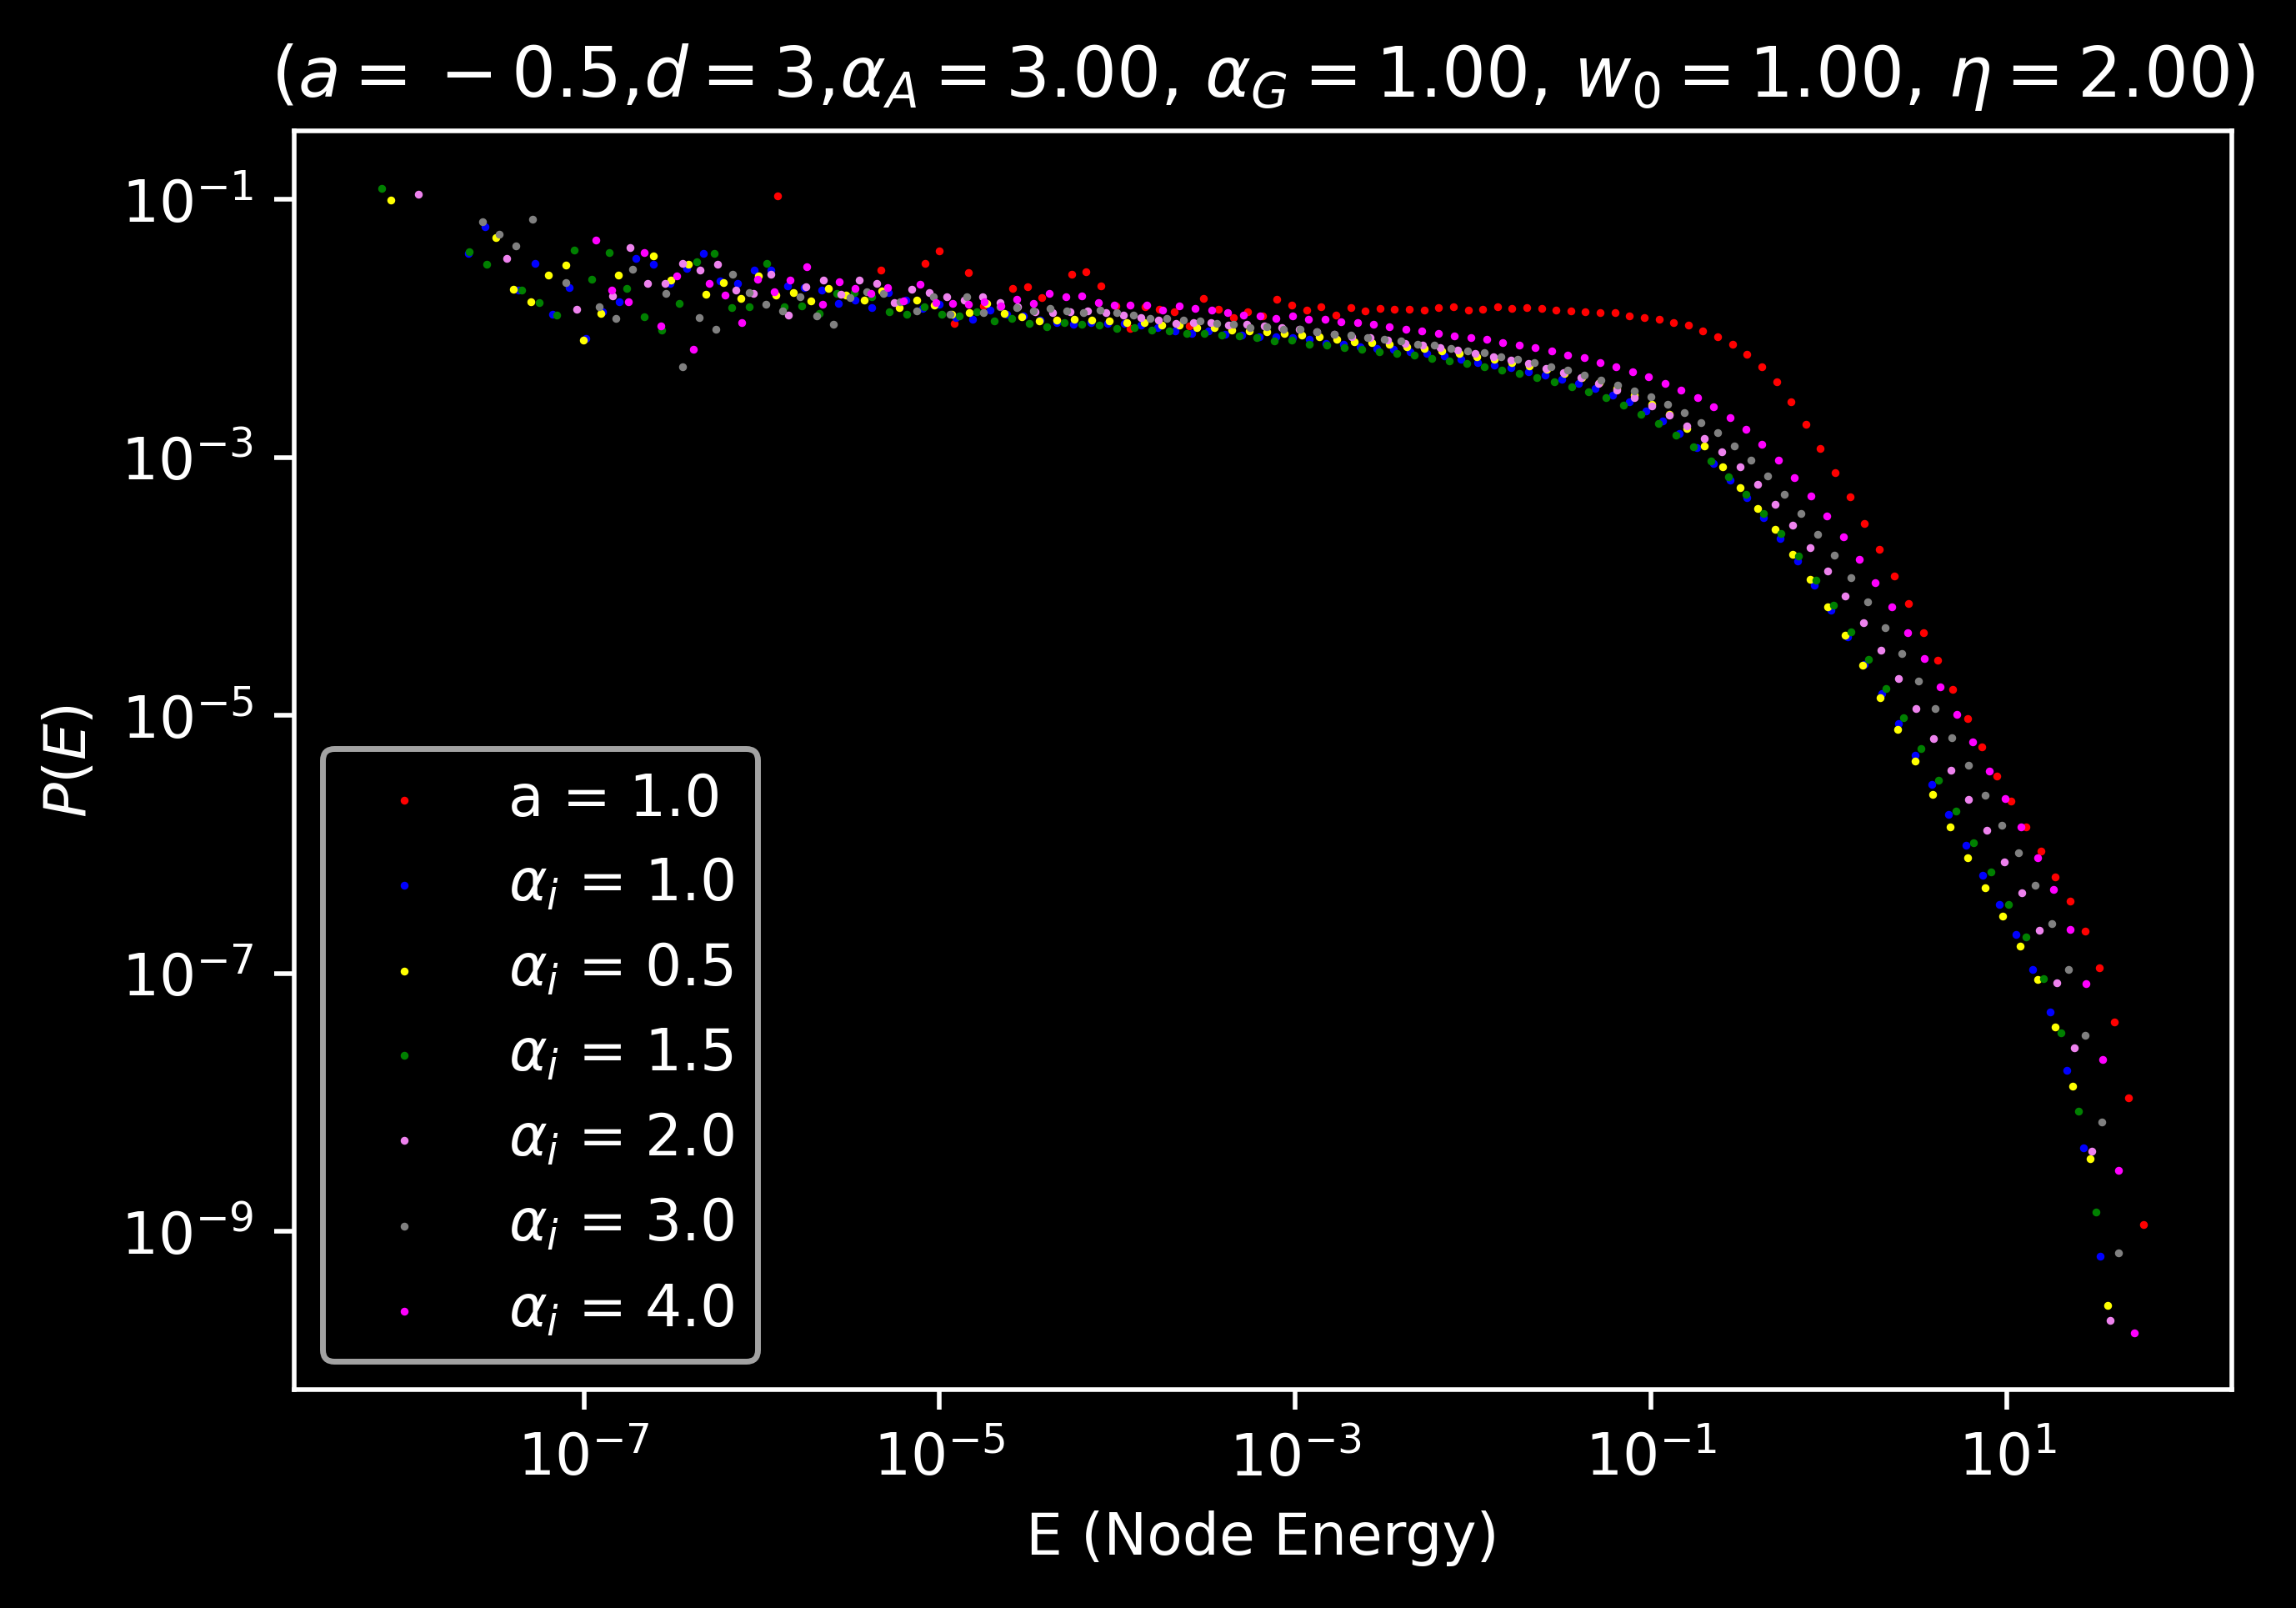

In [69]:
def analyse(N, d, aA, aG, w0, eta, a, a_interaction, bins):
    path1 = r"C:\Users\caiqu\OneDrive\Área de Trabalho\Dados"
    path2 = '\\N_%d_d_%d_aA_%.2f_aG_%.2f_w0_%.2f_eta_%.2f_a_%.6f_a_interaction_%.3f' %(N, d, aA, aG, w0, eta, 0, a_interaction[1])
    path3 = '\\Dados_processados'
    path = path1 + path2+ path3

    
    # Change the directory
    os.chdir(path)

    file = 'N_%d_d_%d_aA_%.2f_aG_%.2f_w0_%.2f_eta_%.2f_a_%.3f_a_interaction_%.3f_histogram_bins_%d.txt' %(N, d, aA, aG, w0, eta, 0, a_interaction[1], bins)
    tabela = np.loadtxt(file)
    bins_midlist = tabela[:, 0]
    p_e = tabela[:, 1]

    plt.scatter(bins_midlist, p_e, s= 3,  linewidths = 0.5, c = 'red',  marker='.', label = r'a = %.1f' %(a_interaction[1]))
    

    for i in range (1,len(a)): 
        path1 = r"C:\Users\caiqu\OneDrive\Área de Trabalho\Dados"
        path2 = '\\N_%d_d_%d_aA_%.2f_aG_%.2f_w0_%.2f_eta_%.2f_a_%.6f_a_interaction_%.3f' %(N, d, aA, aG, w0, eta, a[i], a_interaction[i])
        path3 = '\\Dados_processados'
        path = path1 + path2+ path3

        
        # Change the directory
        os.chdir(path)

        file = 'N_%d_d_%d_aA_%.2f_aG_%.2f_w0_%.2f_eta_%.2f_a_%.3f_a_interaction_%.3f_histogram_bins_%d.txt' %(N, d, aA, aG, w0, eta, a[i], a_interaction[i], bins)
        tabela = np.loadtxt(file)
        bins_midlist = tabela[:, 0]
        p_e = tabela[:, 1]

        plt.scatter(bins_midlist, p_e, s= 3,  linewidths = 0.5, c = cores[i],  marker='.', label = r'$\alpha_i$ = %.1f' %(a_interaction[i]))
    plt.rcParams["figure.dpi"] = 500
    plt.xscale('log')
    plt.yscale('log')
    #plt.xlimit()
    plt.xlabel(r'E (Node Energy)')
    plt.ylabel(r'$ P(E)$')
    plt.title(r'($ a =  %.1f $,$ d= %d$,$ \alpha_{A} =  %.2f$, $\alpha_{G} =%.2f$, $w_{0} = %.2f$, $\eta =  %.2f$)' %(a[1], d, aA, aG, w0, eta))
    #plt.text(1E-5,1E-23,'Energia de cada nó \n (com correção) \n' + r'$E_{i} = \epsilon_{i} + \frac{a}{M}\Sigma_{j \neq i} \frac{\epsilon_{i}\epsilon_{j}}{d_{ij}^{\alpha_{i}}} $'+ '\n'+ r'$\epsilon_{i}$: energia individual do nó i' + '\n' + r'$M = \Sigma_{j \neq i} d_{ij}^{-\alpha_{i}}$', fontsize=11)

    plt.legend()
    #os.chdir(path1)
    #plt.savefig('d_%d_aA_%.2f_aG_%.2f_w0_%.2f_eta_%.2f.jpg' %(d[0], aA[0], aG[0], w0[0], eta[0]), dpi = 500)
    plt.show()

N = 1000
d = 3
aA = 3.00
aG = 1.00
w0 = 1.00
eta = 2
a = [0.0, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5]
a_interaction = [1.0, 1.0, 0.5, 1.5, 2, 3, 4]

plt.style.use('dark_background')
cores = ['orange', 'blue', 'yellow', 'green', 'violet', 'grey', 'magenta', 'white']

bins = 100
    
analyse(N, d, aA, aG, w0, eta, a, a_interaction, bins)
    